In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


EDA to prediction
1. EDA - Exploratory Data Analysis
1.1 Загрузить датасет, очистить
1.2 Подготовка признаков
1.3 Взаимосвязь
- как 1 признак (х1, х2, …) влияет на цель
1.4 Feature engineering (из существующих признаков генерируем свои)
- генерируем минимум 3 признака
1.5 Выводы
- данная переменная влияет на признак так-то 
- обосновать какие переменные берем, какие нет, почему


In [2]:
# Мы имеем два DF, один с статистикой аниме
df = pd.read_csv('./data/raw/anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
# Второй с статистикой пользоваотелей [кто, что, и как оценил]
df_users = pd.read_csv('./data/raw/rating.csv')
df_users.head()
# print(df['episodes'].unique())

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,355,-1


In [4]:

'''
Users = 73_516     and    Titles = 12_294
- anime_id - уникальный идентификатор myanimelist.net, идентифицирующий аниме.
- name - полное название аниме.
- genre - список жанров для данного аниме, разделенный запятыми.
- type - фильм, ТВ, OVA и т.д.
- episodes - сколько эпизодов в данном сериале. (1, если фильм).
- rating - средний рейтинг из 10 для этого аниме.
- members - количество членов сообщества, состоящих в данной "группе". - я так понимаю сколько человек посмотрело
'''
amount = len(df)
print('Amount of titles:', amount)
print('------------')
df.isnull().sum()
# проверяем общее количество нулевых значений
# Как мы можем это исправить?
# Жанр (ручной режим) - решать только в ручном режиме 
# # Тип (ручной режим) - если эпизоды = 1 -> фильм, эпизоды < 12 -> OVA, другие фильмы? 
# Рейтинг - можно найти аниме с одинаковыми жанрами и дать им общую среднюю оценку.

Amount of titles: 11433
------------


anime_id      0
name          0
genre        58
type         22
episodes      0
rating      210
members       0
dtype: int64

In [5]:
df['genre'] = df['genre'].fillna('неизвестно')
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mean())
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

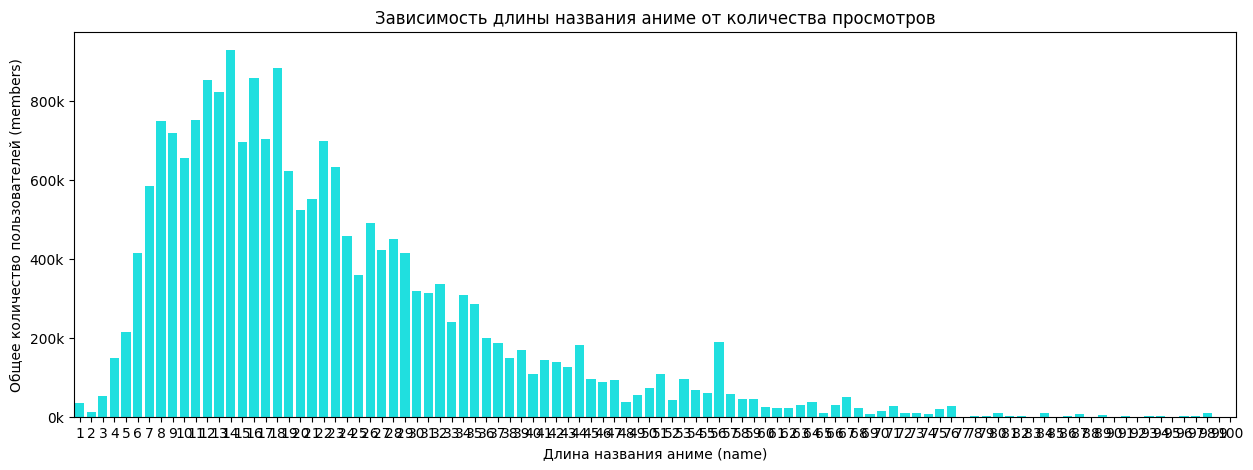

In [6]:
# Очевидно, нам нужно проверить, насколько длина заголовка влияет на аудиторию... пользователи, которые уже смотрели этот заголовок
df['len_of_title'] = df['name'].apply(len) # Это наш первый признак
# Разделим на уникальные группы, суммируем и сгруппируем с обновлением индекса  
df_grouped = df.groupby('len_of_title')['members'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(x='len_of_title', y='members', data=df_grouped, color='cyan')

plt.xlabel('Длина названия аниме (name)')
plt.ylabel('Общее количество пользователей (members)')
plt.title('Зависимость длины названия аниме от количества просмотров')

# Для нашего удобства
formatter = FuncFormatter(lambda x, pos: f'{int(x / 1e4)}k')
plt.gca().yaxis.set_major_formatter(formatter) # gca - get current axis   yaxis - turn to the object Y-label 

plt.show()

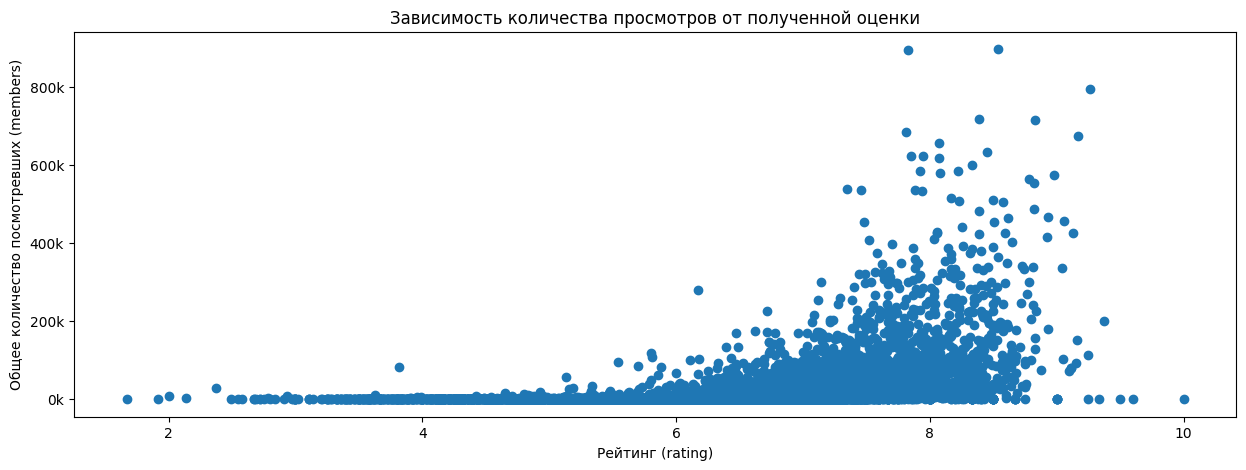

In [7]:
df_grouped = df.groupby('members')['rating'].sum().reset_index()

plt.figure(figsize=(15, 5))
plt.scatter(df['rating'], df['members'])

plt.xlabel('Рейтинг (rating)')
plt.ylabel('Общее количество посмотревших (members)')
plt.title('Зависимость количества просмотров от полученной оценки')

# Для нашего удобства
formatter = FuncFormatter(lambda x, pos: f'{int(x / 1e3)}k')
plt.gca().yaxis.set_major_formatter(formatter) # gca - get current axis   yaxis - turn to the object Y-label 
    
plt.show()

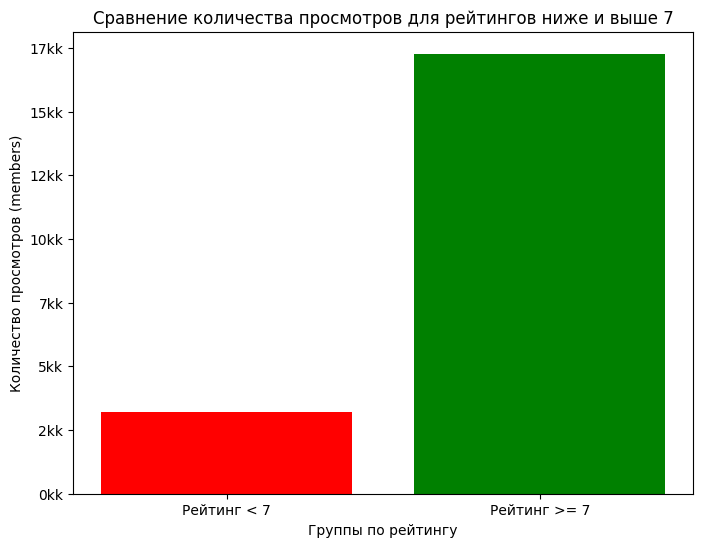

In [8]:
# Мы можем наблюдать восходящий тренд... следовательно, мы можем работать с этими данными
# Сначала мы можем разделить нашу оценку на 7 баллов меньше и на 7 баллов больше (на мой взгляд).
# Построим график зависимости общих просмотров от рейтинга

data_below_six_point = df[df['rating'] < 7]['members'].sum()
data_above_six_point = df[df['rating'] >= 7]['members'].sum()
rating_groups = ['Рейтинг < 7', 'Рейтинг >= 7']
members_counts = [data_below_six_point, data_above_six_point]

plt.figure(figsize=(8, 6))
plt.bar(rating_groups, members_counts, color=['red', 'green'])
plt.xlabel('Группы по рейтингу')
plt.ylabel('Количество просмотров (members)')
plt.title('Сравнение количества просмотров для рейтингов ниже и выше 7')
#plt.grid()

# Для нашего удобства
formatter = FuncFormatter(lambda x, pos: f'{int(x / 1e7)}kk')
plt.gca().yaxis.set_major_formatter(formatter) # gca - get current axis   yaxis - turn to the object Y-label 
plt.show()

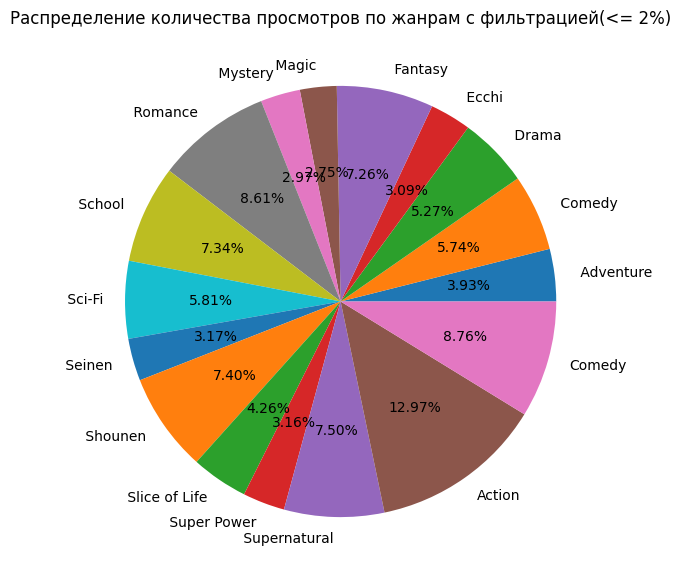

In [9]:
# Поранализуем жанры и постороим зависимость всех жанров от среднего рейтинга всех аниме
# Аналогично с количеством просмотров
df_genres = df.copy()
df_genres['genre'] = df_genres['genre'].str.split(',')
df_genres = df_genres.explode('genre') # разворачивает каждый список жанров в отдельные строки, так что каждый жанр теперь имеет свою строку

genre_members = df_genres.groupby('genre')['members'].sum()
                                                               # иначе не работает, так как сумма должна быть = 1, для pie chart
genre_members_normalized = genre_members / genre_members.sum() # простым языком, мы определяем вес каждого уникального жанра
                                                                                    # Фильтруем жанры, которые составляют менее 2% от общего объема
genre_members_filtered = genre_members_normalized[genre_members_normalized >= 0.02] # приколы пандаса, все true попадают, остальные мимо

plt.figure(figsize=(7, 7))

#plt.subplot(1, 2, 1)
plt.pie(genre_members_filtered, labels=genre_members_filtered.index, autopct='%1.2f%%')
plt.title('Распределение количества просмотров по жанрам с фильтрацией(<= 2%)')

#plt.subplot(1, 2, 2)
#plt.pie(genre_members_normalized, labels=genre_members_normalized.index, autopct='%1.2f%%')
#plt.title('Распределение количества просмотров по жанрам без фильтрации')
#plt.subplots_adjust(hspace=0.8, wspace=0.8)  # регулировка пространтсва

plt.show()

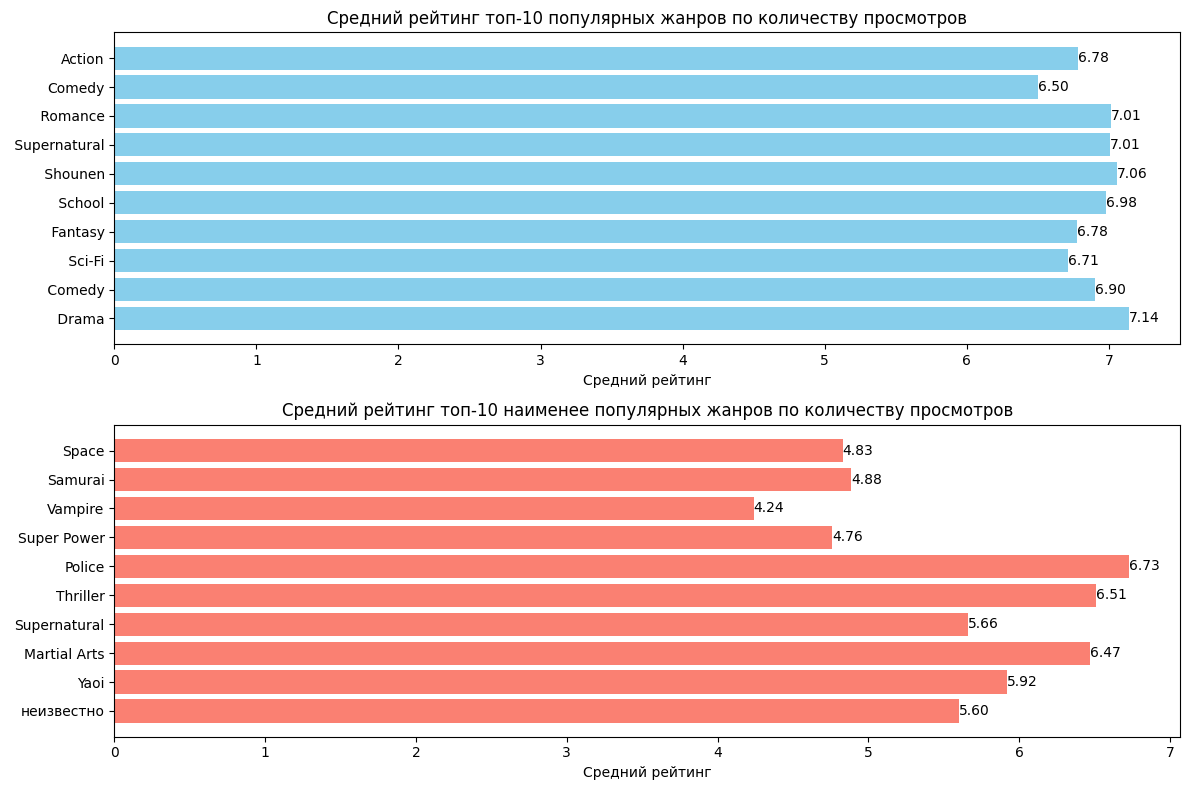

In [10]:
# Найдем средний рейтинг 10 популярных жанров и 10 наименее популярных жанров 
df_genres = df.copy()
df_genres['genre'] = df_genres['genre'].str.split(',')
df_genres = df_genres.explode('genre').reset_index(drop=True)

genre_rating = df_genres.groupby('genre')['rating'].mean()
genre_members = df_genres.groupby('genre')['members'].sum()

top_genres_high_views = genre_members.nlargest(10).index
top_genres_low_views = genre_members.nsmallest(10).index

top_genres_high_views_rating = genre_rating[top_genres_high_views]
top_genres_low_views_rating = genre_rating[top_genres_low_views]

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.barh(top_genres_high_views_rating.index, top_genres_high_views_rating.values, color="skyblue")
plt.xlabel('Средний рейтинг')
plt.title('Средний рейтинг топ-10 популярных жанров по количеству просмотров')
plt.gca().invert_yaxis()
for index, value in enumerate(top_genres_high_views_rating.values):
    plt.text(value, index, f'{value:.2f}', va='center')  # Аннотация значений

plt.subplot(2, 1, 2)
plt.barh(top_genres_low_views_rating.index, top_genres_low_views_rating.values, color="salmon")
plt.xlabel('Средний рейтинг')
plt.title('Средний рейтинг топ-10 наименее популярных жанров по количеству просмотров')
plt.gca().invert_yaxis()
for index, value in enumerate(top_genres_low_views_rating.values):
    plt.text(value, index, f'{value:.2f}', va='center')  # Аннотация значений

plt.tight_layout() # вроде удобная штука
plt.show()
# Видим, что жанры имеющие наибольшее количество просмотров имееют меньший разброс рейтинга 7±0.2,
# а наименее популярные жанры имеют огромный разброс и меньшую количественную оценку, т.к. являются специфичным жанром
# Можем сделать вывод, что от количество просмотров зависит оценка

In [11]:
# Признаки - среднее количество просмотров жанра и средняя оценка жанра
# Учтем, что жанров может быть несколько
df['genre'] = df['genre'].str.split(',')
df_genres = df.explode('genre').reset_index()

genre_rating = df_genres.groupby('genre')['rating'].mean()
genre_members = df_genres.groupby('genre')['members'].mean()
print(genre_members.head())

def avg_genre_rating(genres):
    # Для каждого жанра получаем рейтинг из genre_rating
    genre_ratings = genre_rating[genres]  # выбираем средний рейтинг по жанрам
    return genre_ratings.mean()

def avg_members_genre(genres):
    genre_members_ = genre_members[genres]  
    return genre_members_.mean()

df['avg_rating_genre'] = df['genre'].apply(lambda genres: avg_genre_rating(genres))
df['avg_members_genre'] = df['genre'].apply(lambda genres: avg_members_genre(genres))
# Суммируем все жанры и находим среднее
# df.head()

genre
Adventure    32557.998797
Cars         12530.705882
Comedy       29175.914328
Dementia     15844.387097
Demons       42323.272727
Name: members, dtype: float64


In [12]:
df.loc[df['name'] == 'Naruto'].head(30)

,anime_id,name,genre,type,episodes,rating,members,len_of_title,avg_rating_genre,avg_members_genre
775,20,Naruto,"[Action, Comedy, Martial Arts, Shounen, Su...",TV,220,7.81,683297,6,6.892501,34452.340008


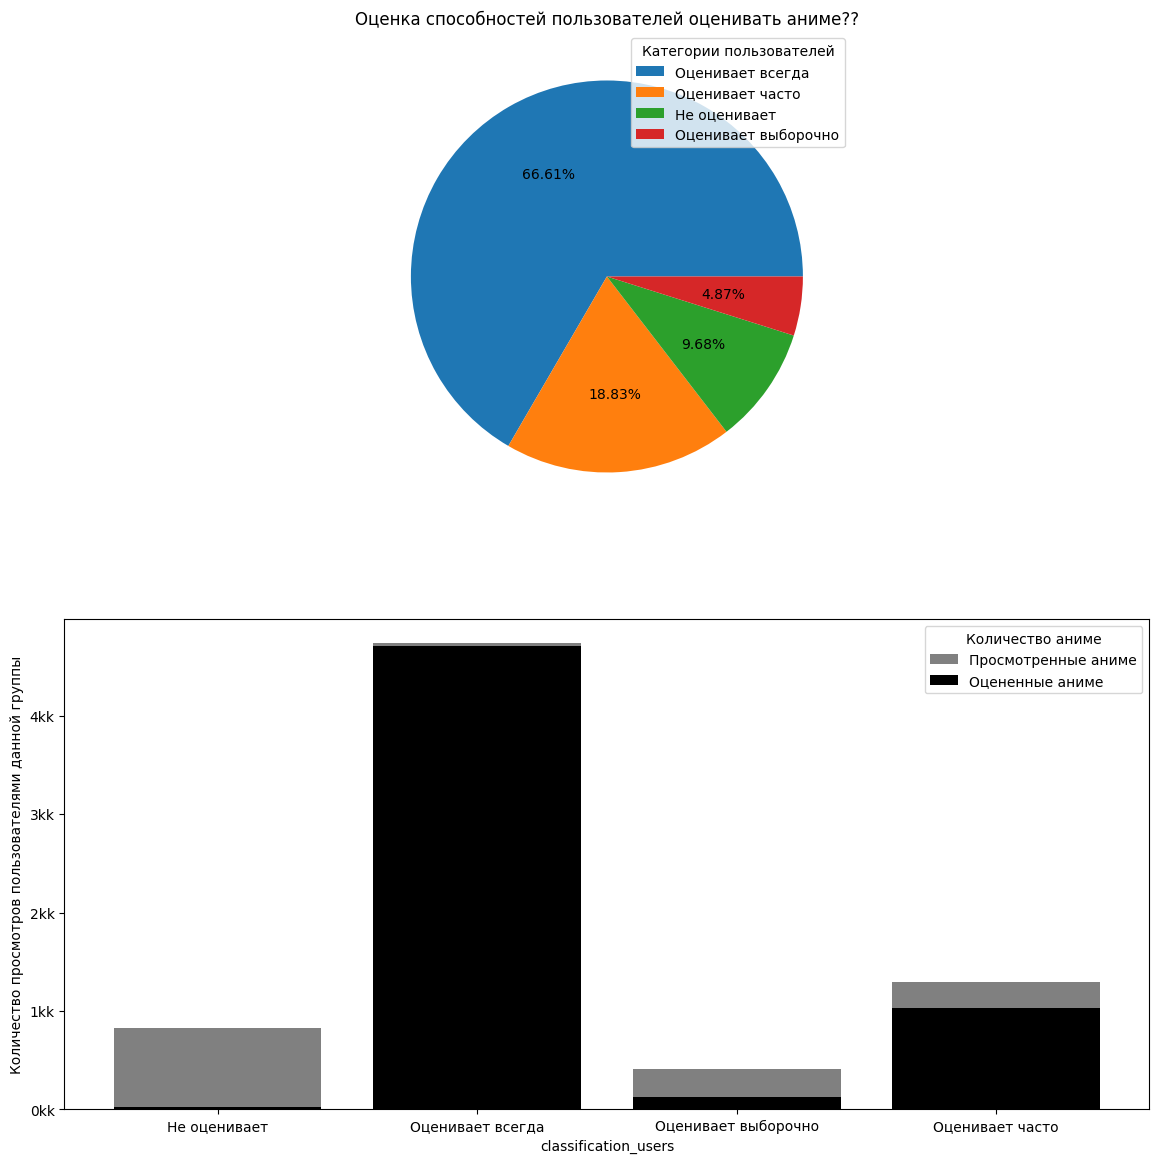

In [13]:
# Найдем %процент% пользователей кто оценивает аниме
# Предположим, если пользователь оценил более 85%~ просмотренных аниме, то он оценивает -> в будущем можно взять средний рейтинг
#              если пользователь оценил от 50 - 85%~ просмотренных аниме, то он переодично оценивает, либо избегает плохих оценок -> можно приравнять все недостающие оценки до ~5б
#              если пользователь оценил от 15 - 50%~ просмотренных аниме, то он оценивает выборочно -> в будущем не брать в статистику, данные могут быть не корректны
#              если пользователь оценил менее 15%~ -> не оценивает -> не брать в статистику

df_ratings = df_users.copy()

df_ratings['rated'] = df_ratings['rating'] != -1  # True для оцененных, False для неоцененных
df_ratings['rating'] = df_ratings['rating'].replace(-1, float('nan'))  # Заменим -1 на NaN для подсчета среднего

# Группируем данные по user_id для подсчета просмотров и оценок
user_stats = df_ratings.groupby('user_id').agg(
    total_watched=('anime_id', 'count'),          # Общее количество просмотренных аниме
    total_rated=('rated', 'sum')                  # Количество оцененных аниме (True считается как 1) для этого и заменяли на NaN
).reset_index()

user_stats['rating_percentage'] = (user_stats['total_rated'] / user_stats['total_watched']) * 100

# Классифицируем пользователей в зависимости от процента оценок
def classify_user(row):
    if row['rating_percentage'] > 95:
        return 'Оценивает всегда'
    elif 50 <= row['rating_percentage'] <= 95:
        return 'Оценивает часто'
    elif 15 <= row['rating_percentage'] < 50:
        return 'Оценивает выборочно'
    else:
        return 'Не оценивает'

user_stats['classification'] = user_stats.apply(classify_user, axis=1) # axis=1 - строки, axis=0 - столбцы
classification_counts = user_stats['classification'].value_counts()

classification_grouped = user_stats.groupby('classification').agg(
    total_watched=('total_watched', 'sum'),
    total_rated=('total_rated', 'sum')
).reset_index()

plt.figure(figsize=(14, 14))
plt.subplot(2,1,1)
plt.pie(classification_counts, autopct='%1.2f%%')
plt.title('Оценка способностей пользователей оценивать аниме??')
plt.legend(classification_counts.index, title='Категории пользователей', loc='upper right', fontsize=10)

anime_ = ['Просмотренные аниме', 'Оцененные аниме']

plt.subplot(2,1,2)
plt.bar(classification_grouped['classification'], classification_grouped['total_watched'], color='grey')
plt.bar(classification_grouped['classification'], classification_grouped['total_rated'], color='black')
plt.xlabel('classification_users')
plt.ylabel('Количество просмотров пользователями данной группы')
plt.legend(anime_, title='Количество аниме', loc='upper right', fontsize=10)

formatter = FuncFormatter(lambda x, pos: f'{int(x / 1e6)}kk')
plt.gca().yaxis.set_major_formatter(formatter) # gca - get current axis   yaxis - turn to the object Y-label 

plt.show()

# дополнительные признаки, дополним df
df_users.head()
df_users = pd.merge(df_users, user_stats[['user_id', 'classification', 'rating_percentage']], on='user_id', how='left')

In [14]:
# Переформируем признак classicification_users -> user_activity - будет показывать метрику, которая означает 
# какое колbчество людей оценило аниме из просмотревших
df_users_cleaned = df_users.copy()
df_users_cleaned.loc[df_users_cleaned['rating'] == -1, 'rating'] = np.nan
df_users_grouped = df_users_cleaned.groupby('anime_id').agg(
    rated_count=('rating', 'count'), # Сколько оценило (исключая NaN)
    total_viewers=('rating', 'size') # Сколько всего посмотревших (включая NaN)
).reset_index()
df['user_activity'] = df_users_grouped['rated_count'] / df_users_grouped['total_viewers'] * 100 # это будет процентной метрикой
df.head()

,anime_id,name,genre,type,episodes,rating,members,len_of_title,avg_rating_genre,avg_members_genre,user_activity
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,14,6.948367,41404.111774,86.637002
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic,...",TV,64,9.26,793665,32,6.917252,32263.760498,83.570986
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.25,114262,8,6.817998,25788.449242,84.633363
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572,11,6.759982,58774.906677,82.326531
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.16,151266,13,6.817998,25788.449242,73.947368


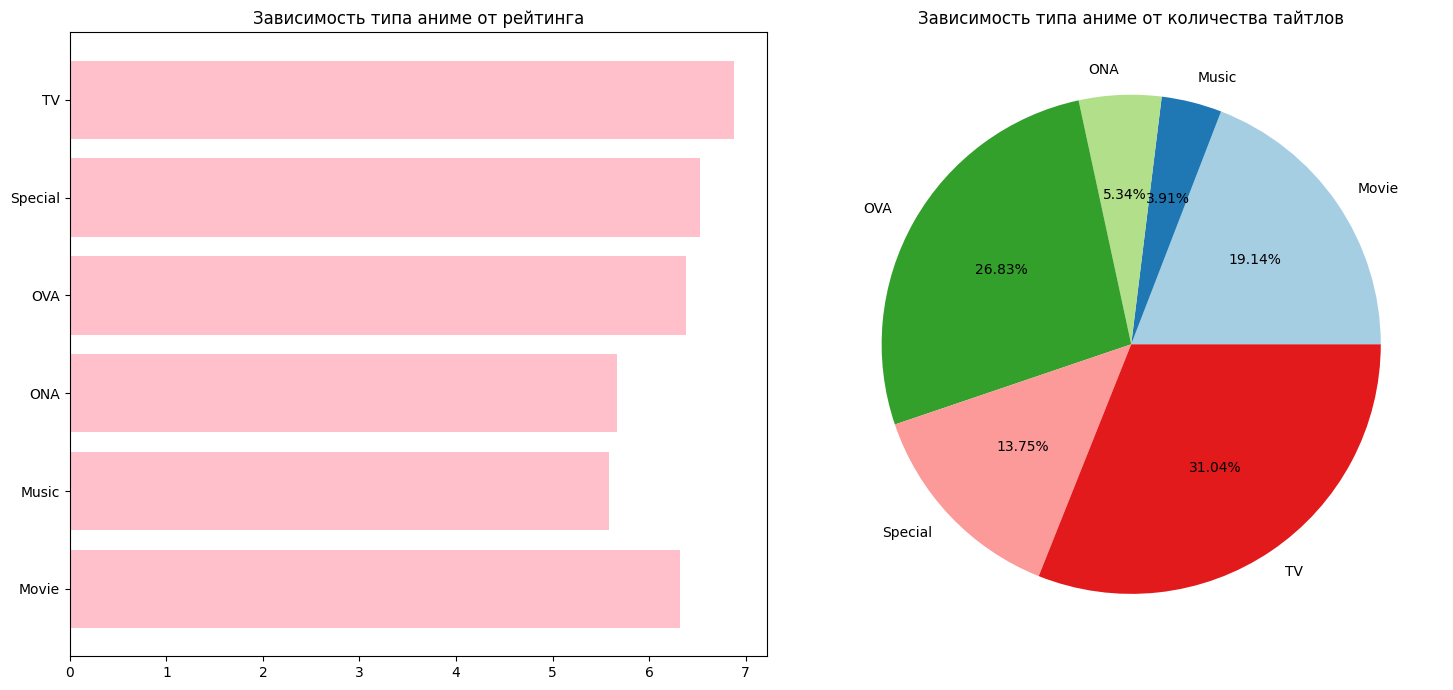

In [15]:
df_grouped = df.groupby('type').agg({'rating': 'mean', 'anime_id': 'count'}).reset_index()

plt.figure(figsize=(15, 7))

# Средний рейтинг по типам аниме
plt.subplot(1, 2, 1)
plt.barh(df_grouped['type'], df_grouped['rating'], color="pink")
plt.title('Зависимость типа аниме от рейтинга')

# Количество аниме по типам
plt.subplot(1, 2, 2)
plt.pie(df_grouped['anime_id'], labels=df_grouped['type'], autopct='%1.2f%%', colors=plt.cm.Paired.colors)
plt.title('Зависимость типа аниме от количества тайтлов')

plt.tight_layout()  # регулировка расположения графиков

plt.show()

# Добавим второй признак!
# Чем больше аниме в категории, тем более разнообразные вкусы и мнения среди зрителей. Следовательно отследить средний
# рейтинг у непопулярных типов аниме(music, ona) легче предсказать? или нет? 
df['anime_count_by_type'] = df['type'].map(df_grouped.set_index('type')['anime_id'])
# Также хочу добавить "Соотношение среднего рейтинга аниме[type] и количества аниме"
# По идее... Если категория имеет высокое соотношение рейтинга и количества аниме,
# это может означать, что рейтинг в этой категории предсказуем и стабильнее
df['avg_rating_by_type'] = df['type'].map(df_grouped.set_index('type')['rating']) # Средний рейтинг для галочки тут
# 3ий признак! Задидим метрику в таком виде...
df['avg_type_rating_to_anime_count'] = df['avg_rating_by_type'] / df['anime_count_by_type']


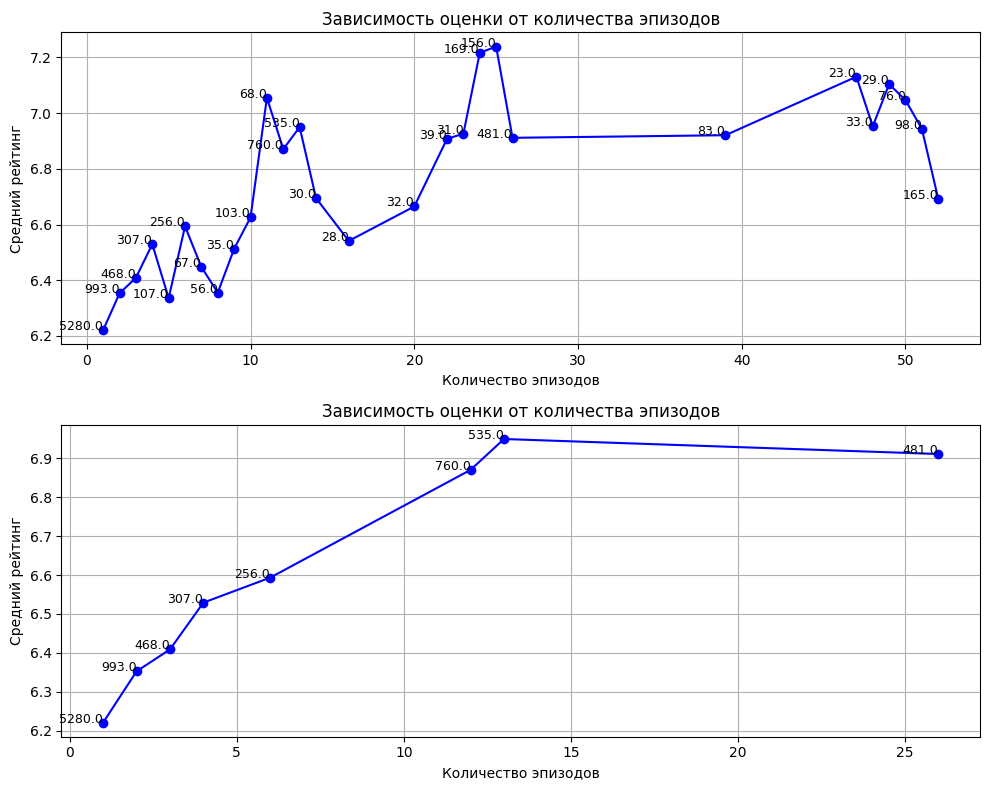

In [16]:
# Проверим как количество эпизодов влияет на среднюю оценку
df_ep = df['episodes'].unique()
count_of_unknown = (df_ep == 'Unknown').sum()
# print(count_of_unknown) - это единичный случай - не берем


df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')  # в числовой формат -> игнорируем ошибки (Unknown -> NaN)
df_episodes = df.dropna(subset=['episodes']).copy() # а тут удалим их
                                                    # subset - указывает на удаление в конкретном столбце
episode_counts = df_episodes['episodes'].value_counts()

df_episodes = df_episodes[df_episodes['episodes'].isin(episode_counts[episode_counts > 20].index)] # фильтруем данные
                                                                                            
df_grouped = df_episodes.groupby('episodes').agg(
    rating_mean=('rating', 'mean'),
    count=('rating', 'size')
).reset_index()

plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(df_grouped['episodes'], df_grouped['rating_mean'], color='blue', marker='o', linestyle='-')
plt.xlabel('Количество эпизодов')
plt.ylabel('Средний рейтинг')        
plt.title('Зависимость оценки от количества эпизодов')
plt.grid(True)

for i, row in df_grouped.iterrows():
    plt.text(row['episodes'], row['rating_mean'], f"{row['count']}", ha='right', fontsize=9)

df_episodes = df_episodes[df_episodes['episodes'].isin(episode_counts[episode_counts > 200].index)] # фильтруем данные
                                                                                            
df_grouped = df_episodes.groupby('episodes').agg(
    rating_mean=('rating', 'mean'),
    count=('rating', 'size')
).reset_index()

plt.subplot(2,1,2)
plt.plot(df_grouped['episodes'], df_grouped['rating_mean'], color='blue', marker='o', linestyle='-')
plt.xlabel('Количество эпизодов')
plt.ylabel('Средний рейтинг')        
plt.title('Зависимость оценки от количества эпизодов')
plt.grid(True)

for i, row in df_grouped.iterrows():
    plt.text(row['episodes'], row['rating_mean'], f"{row['count']}", ha='right', fontsize=9)

plt.tight_layout()
plt.show()
# График ничего не даёт?
# Второй график особо не репрезентабелен, относительно первого

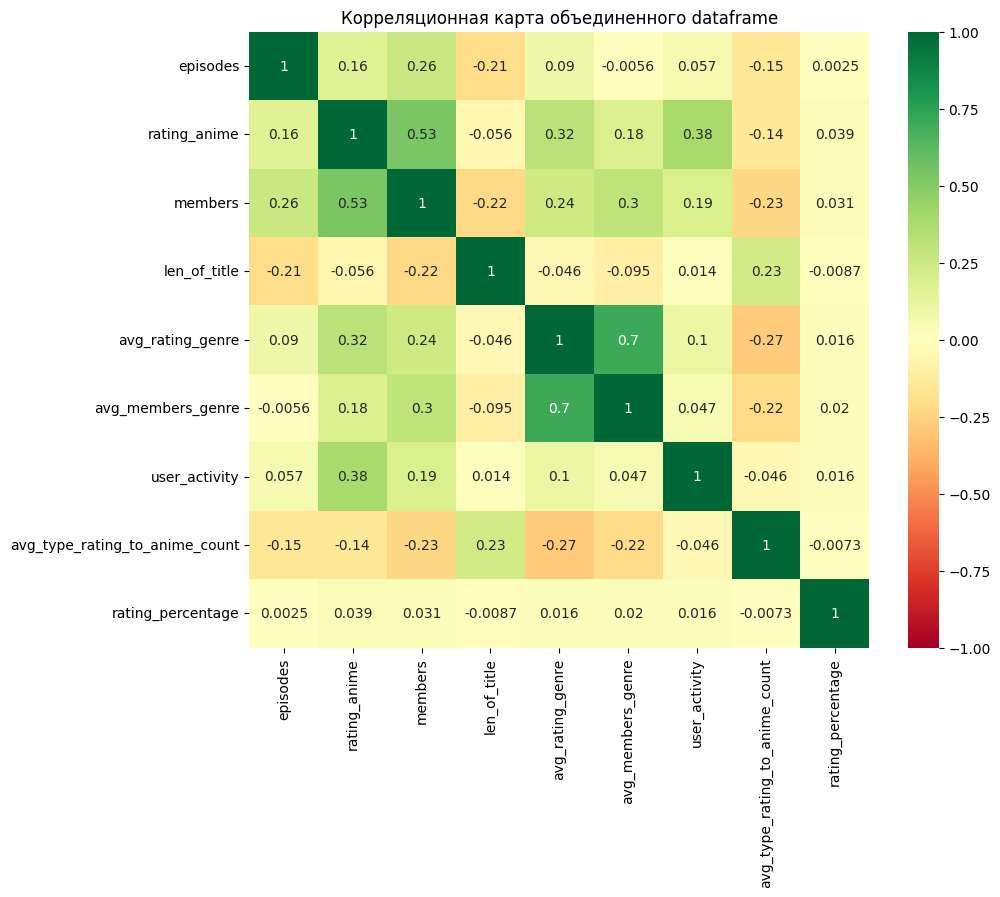

In [17]:
df_merged = pd.merge(df, df_users, on='anime_id', suffixes = ('_anime', '_user'))

# Не забыть дропнуть колонки лишние
df_merged_cleaned = df_merged.drop(columns=['anime_id','user_id','name','genre','type','rating_user', 'avg_rating_by_type', 'anime_count_by_type'])
df_numeric = df_merged_cleaned.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))  # размер графика
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Корреляционная карта объединенного dataframe")
plt.show()

Вывод:
    Создана своя собственная EDA, исследованы некоторые зависимости признаков из дата на целевую переменную(rating), сформированные свои признаки(представлены ниже).
Сформированные признаки(краткая аннотация):
1) df['len_of_title'] - длина аниме
2) df['avg_type_rating_to_anime_count'] - отношение среднего рейтинга по типу аниме и количество такого типа аниме в датасете
3) df['user_activity'] - как часто пользователи оценивают аниме после просмотра(активность пользователя в процентах)
4) df['avg_members_genre'] - среднее количество просмотров, если их несколько, то берем mean()
5) df['avg_rating_genre'] - средний рейтинг жанра, если их несколько, то берем mean()
    Из тепловой карты(корреляционной матрицы) увидим, что просмотры['members'] это наиболее коррелирующая с целевой переменная, следовательно, влияние на неё сильно сказывается на целевой переменной. Поэтому, если просмотры коррелируют от какого-либо признака, то это значит, что и целевая зависит от неё.
   Как эти признаки влияют на целевую переменную:
1) Длина аниме влияет на просмотры, а просмотры влияют на рейтинг
2) Рейтинг распределяется почти равномерно. Но! Необхдимо учитывать, что существуют специфичные типы(Music), количество которых кратно меньше, чем более популярных. Для этого и создана эта метрика.
3) Активность пользователя поможет понять насколько "правильный"/"верный" рейтинг, аниме может быть как и не до оценено или переоценно, из-за завышенной оценки и малом %те оценивших
4) и 5) После исследования влияния просмотров и рейтинга на жанры (соответствующие графики построены) выбираемые пользователями, сделан вывод о том, что по аниме можно судить исходя из жанров, которые оно содержит.
    Очевидно, что это только малая часть признаков, выделенных мной. Если будут проблемы при построении модели линейной регрессии, то с помощью своих исследований, проведенных выше, я без проблем, могу ввести дополнительные признаки.
   Поставленные задачи выполненны, работу можно считать выполенной

In [18]:
df.loc[df['name'] == 'Naruto'].head(30)

,anime_id,name,genre,type,episodes,rating,members,len_of_title,avg_rating_genre,avg_members_genre,user_activity,anime_count_by_type,avg_rating_by_type,avg_type_rating_to_anime_count
775,20,Naruto,"[Action, Comedy, Martial Arts, Shounen, Su...",TV,220.0,7.81,683297,6,6.892501,34452.340008,80.348653,3549,6.881314,0.001939
